In [2]:
from notebook.services.config import ConfigManager
ConfigManager().update('notebook', {'ExecuteTime': {
       'display_absolute_timestamps': False,
    'relative_timing_update_period': 5,
    'template': {
        'executed': 'started ${start_time}, finished in ${duration}',
    }
}})
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import ast
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor # ML
from sklearn.inspection import permutation_importance # computing feature importance
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from datetime import datetime
warnings.filterwarnings("ignore")

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

/Users/lu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [4]:
train.shape

(3000, 23)

In [5]:
train.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [7]:
#Refence:https://www.kaggle.com/code/somang1418/eda-lgb-xgb-modelings-with-a-cute-panda-meme/notebook#Data-Pre-processing-&-EDA
#Attribute Explanation
#ID - Integer unique id of each movie
#Belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg
#Budget:Budget of a movie in dollars. 0 values mean unknown.
#Genres : Contains all the Genres Name & TMDB Id in JSON Format
#Homepage - Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/ , this is the homepage of Whiplash movie.
#Imdb_id - IMDB id of a movie (string). You can visit the IMDB Page like this: https://www.imdb.com/title/
#Original_language - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french.
#Original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.
#Overview - Brief description of the movie.
#Popularity - Popularity of the movie in float.
#Poster_path - Poster path of a movie. You can see the full image like this: https://image.tmdb.org/t/p/original/
#Production_companies - All production company name and TMDB id in JSON format of a movie.
#Production_countries - Two digit code and full name of the production company in JSON format.
#Release_date - Release date of a movie in mm/dd/yy format.
#Runtime - Total runtime of a movie in minutes (Integer).
#Spoken_languages - Two digit code and full name of the spoken language.
#Status - Is the movie released or rumored?
#Tagline - Tagline of a movie
#Title - English title of a movie
#Keywords - TMDB Id and name of all the keywords in JSON format.
#Cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format
#Crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.
#Revenue - Total revenue earned by a movie in dollars.



In [8]:
test.shape

(4398, 22)

In [9]:
test.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [10]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [11]:
test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


<AxesSubplot:>

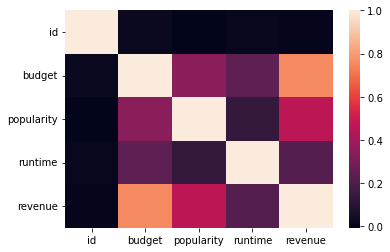

In [12]:
sns.heatmap(train.corr())

In [13]:
# Missing value in both sets
print("Missing value in train set:")
print(train.isna().sum().sort_values(ascending=False))
print("\n")
print("Missing value in test set:")
print(test.isna().sum().sort_values(ascending=False))

Missing value in train set:
belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
title                       0
status                      0
id                          0
release_date                0
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
revenue                     0
dtype: int64


Missing value in test set:
belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22


In [14]:
# There is one movie's release_date missing in test
# Find this movie
test[test["release_date"].isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,...,NaN,NaN,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN


In [15]:
# I searched the movie and the release date is 01/05/2000
# Add release date
test.loc[test['release_date'].isnull()==True, 'release_date']= '5/1/00'

In [16]:
#reference: https://www.kaggle.com/code/bernabas/eda-random-forest-xgboost-tmdb-box-office
#I have broken down the release date into year, month and day.
train['release_date'] = pd.to_datetime(train['release_date'], format='%m/%d/%y')
test['release_date'] = pd.to_datetime(test['release_date'], format='%m/%d/%y')

releaseDate = pd.to_datetime(train['release_date']) 
train["release_year"] = pd.to_datetime(train["release_date"]).dt.year.astype(int)
train["release_day"] = pd.to_datetime(train["release_date"]).dt.day.astype(int)
train["release_dayofweek"] = pd.to_datetime(train["release_date"]).dt.dayofweek.astype(int)
train["release_month"] = pd.to_datetime(train["release_date"]).dt.month.astype(int)
test["release_year"] = pd.to_datetime(test["release_date"]).dt.year.astype(int)
test["release_day"] = pd.to_datetime(test["release_date"]).dt.day.astype(int)
test["release_dayofweek"] = pd.to_datetime(test["release_date"]).dt.dayofweek.astype(int)
test["release_month"] = pd.to_datetime(test["release_date"]).dt.month.astype(int)

In [17]:
# Fixing the dates
def fix_date(x):
    if x > 2019:
        return x - 100
    else:
        return x 

train['release_year'] = train['release_year'].apply(lambda x: fix_date(x))
test['release_year'] = test['release_year'].apply(lambda x: fix_date(x))

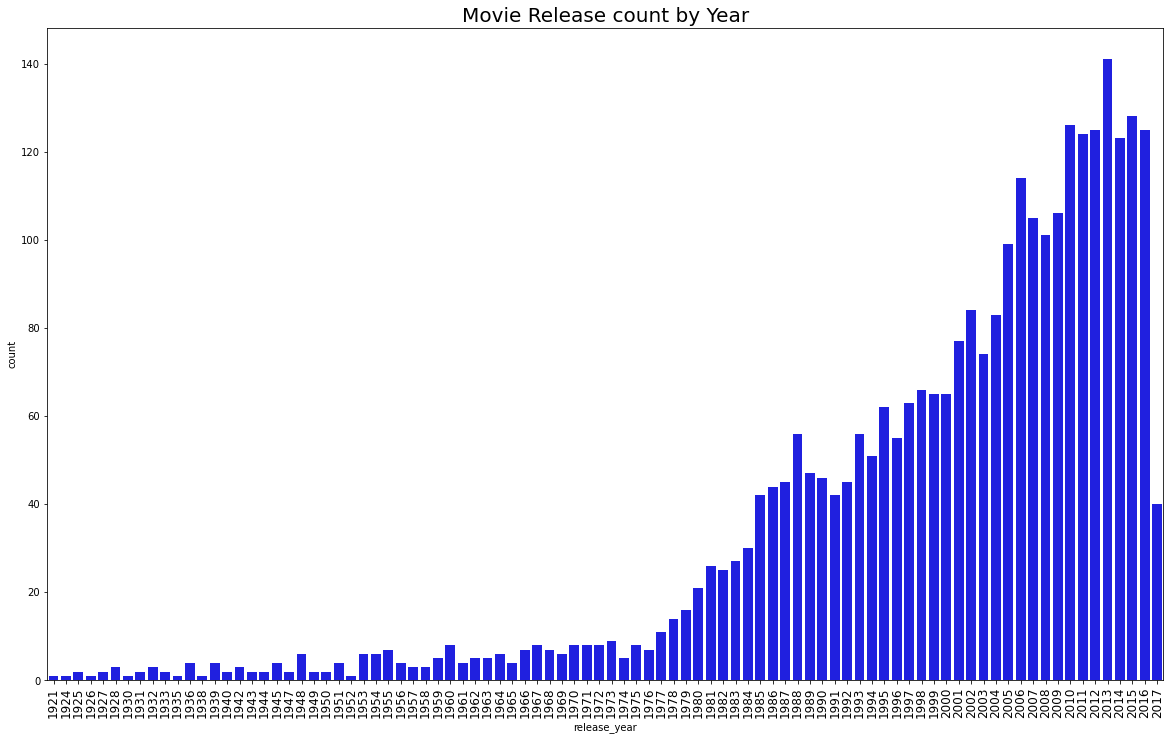

In [19]:

plt.figure(figsize=(20,12))
sns.countplot(train['release_year'].sort_values(), color = 'blue')
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

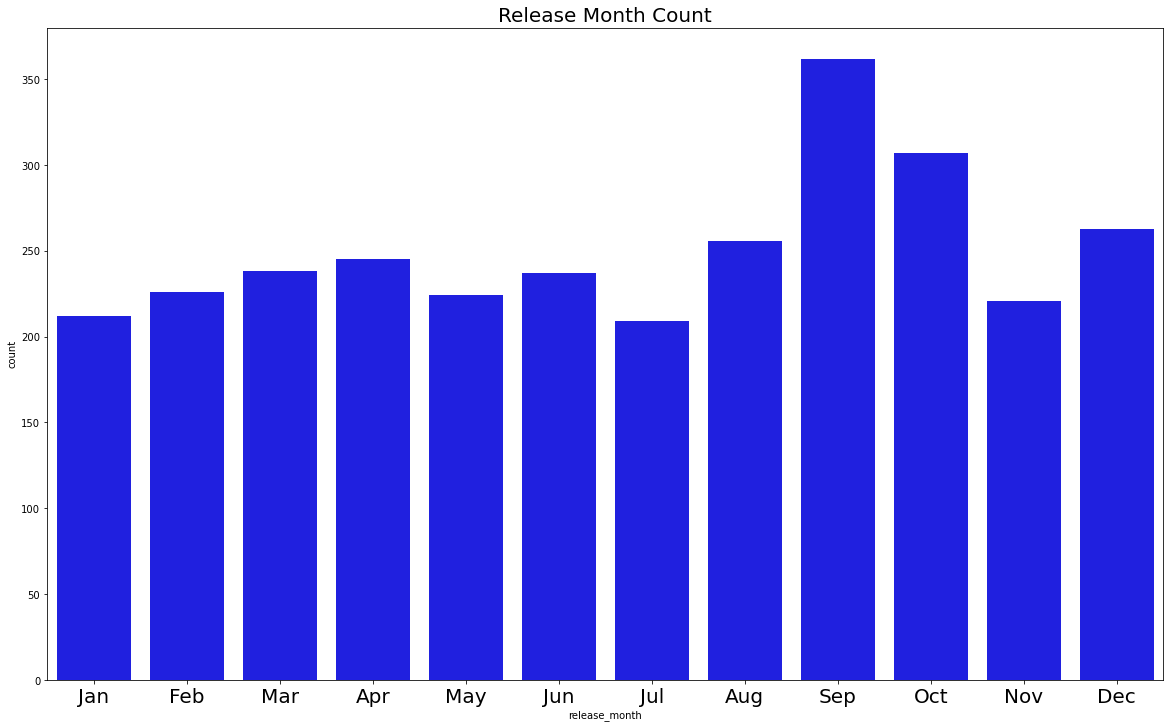

In [25]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_month'].sort_values(), color = 'blue')
plt.title("Release Month Count",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

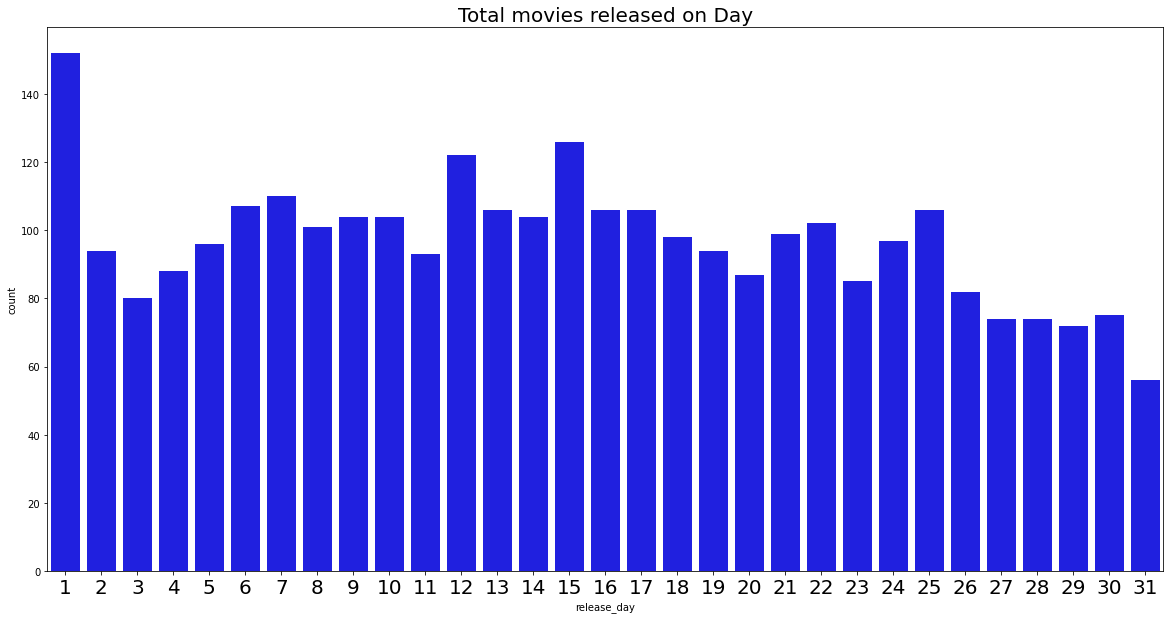

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(train['release_day'].sort_values(), color = 'blue')
plt.title("Total movies released on Day",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(fontsize=20)
plt.show()

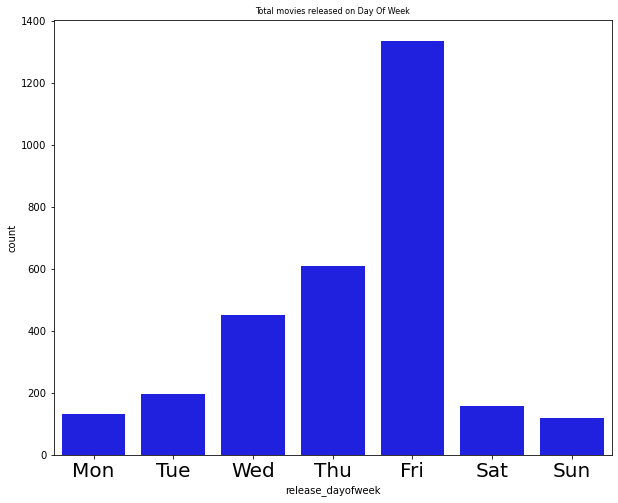

In [87]:
plt.figure(figsize=(10,8))
sns.countplot(train['release_dayofweek'].sort_values(), color = 'blue')
plt.title("Total movies released on Day Of Week",fontsize=8)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

In [28]:
#Pre-process
#'status'
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [29]:
test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [30]:
train[train['status']=="Rumored"]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,release_year,release_day,release_dayofweek,release_month
609,610,"[{'id': 144200, 'name': 'Swan Princess Series'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,tt0120254,en,The Swan Princess: Escape from Castle Mountain,The first wedding anniversary of Princess Odet...,5.121309,...,It Will Take All Her Magic to Rescue Her Friends!,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644,1997,1,2,1
1007,1008,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1860180,en,Billy Gardell: Halftime,"Billy Gardell, the star of CBS' hit comedy ""Mi...",0.007877,...,NaN,Billy Gardell: Halftime,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60,2011,5,5,2
1216,1217,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0091024,en,Extremities,A woman escapes from the man who is about to r...,10.273979,...,"When fear made her a victim, she turned fear i...",Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091,1986,22,4,8
1618,1619,NaN,891000,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0145394,en,A Place Called Chiapas,"On January 1, 1994, the Zapatista National Lib...",0.179246,...,Inside the world's first postmodern revolution,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000,1998,20,4,2


In [31]:
# Remove 'status' since the meaning "Rumored" does not make sense, 
# if the moive has the revenue, then it should not be rumored. Also, 3 out of 4 the budget are zero. 
# 'status' is useless, and drop it.

train.drop(['status'], axis=1, inplace=True)
test.drop(['status'], axis=1, inplace=True)

In [32]:
#Process 'homepage'
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

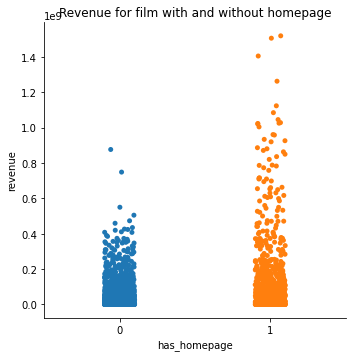

In [33]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for film with and without homepage');

In [34]:
#'tagline'
train['tagline'].value_counts().head()

Based on a true story.                                         3
Who is John Galt?                                              2
The Laws of Space and Time are About to be Violated.           1
One of the guys. One of the Spies.                             1
A Challenge He Never Imagined. A Teacher He Never Expected.    1
Name: tagline, dtype: int64

In [35]:
#'tagline' is also unique to every movie like 'homepage',
# so it is also useless
train['tagline'] = train['tagline'].apply(lambda x: 0 if x==0 else 1)
test['tagline'] = test['tagline'].apply(lambda x: 0 if x==0 else 1)

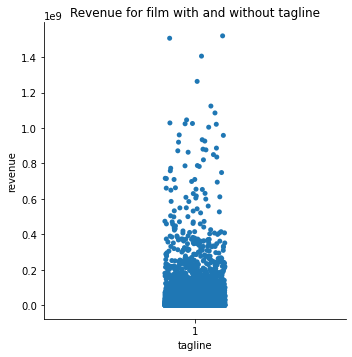

In [36]:
sns.catplot(x='tagline', y='revenue', data=train);
plt.title('Revenue for film with and without tagline');

In [37]:
#'poster_path'
train['poster_path'].value_counts().head()

/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg    1
/3GwIEvxwMcU9tZO6RqkKHVPDn5z.jpg    1
/fkURS96D2ceuocZIBuyiIBGHilF.jpg    1
/xaOq0BnMHl445iZ4B7szBzaWgjS.jpg    1
/4gpW4MkRI0BB17GHOJzXq0WamDP.jpg    1
Name: poster_path, dtype: int64

In [38]:
#drop 'tagline''homepage''poster_path'
train.drop(['tagline'], axis=1, inplace=True)
train.drop(['homepage'], axis=1, inplace=True)
train.drop(['has_homepage'], axis=1, inplace=True)
train.drop(['poster_path'], axis=1, inplace=True)

test.drop(['poster_path'], axis=1, inplace=True)
test.drop(['has_homepage'], axis=1, inplace=True)
test.drop(['tagline'], axis=1, inplace=True)
test.drop(['homepage'], axis=1, inplace=True)

In [39]:
# Missing value in both sets
print("Missing value in train set:")
print(train.isna().sum().sort_values(ascending=False))
print("\n")
print("Missing value in test set:")
print(test.isna().sum().sort_values(ascending=False))

Missing value in train set:
belongs_to_collection    2396
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
id                          0
release_dayofweek           0
release_day                 0
release_year                0
revenue                     0
release_date                0
title                       0
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
release_month               0
dtype: int64


Missing value in test set:
belongs_to_collection    3521
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22
genres                     16
overview                   14


In [40]:
# Fill Missing Nominal Values with 0 or ''
train['belongs_to_collection'] = train['belongs_to_collection'].fillna(0)
train['Keywords'] = train['Keywords'].fillna('')
train['production_companies'] = train['production_companies'].fillna('')
train['production_countries'] = train['production_countries'].fillna('')
train['spoken_languages'] = train['spoken_languages'].fillna(0)
train['crew'] = train['crew'].fillna('')
train['cast'] = train['cast'].fillna('')
train['title'] = train['title'].fillna(0)
train['overview'] = train['overview'].fillna(0)
train['genres'] = train['genres'].fillna('')

test['belongs_to_collection'] = test['belongs_to_collection'].fillna(0)
test['Keywords'] = test['Keywords'].fillna('')
test['production_companies'] = test['production_companies'].fillna('')
test['production_countries'] = test['production_countries'].fillna('')
test['spoken_languages'] = test['spoken_languages'].fillna(0)
test['crew'] = test['crew'].fillna('')
test['cast'] = test['cast'].fillna('')
test['title'] = test['title'].fillna(0)
test['overview'] = test['overview'].fillna(0)
test['genres'] = test['genres'].fillna('')


In [41]:
#For numerical data, replacing the missing values with the mean
train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(train['runtime'].mean())
train['runtime'].isnull().any()

False

In [42]:
# All missing values are filled
print("Missing value in train set:")
print(train.isna().sum().sort_values(ascending=False))
print("\n")
print("Missing value in test set:")
print(test.isna().sum().sort_values(ascending=False))

Missing value in train set:
id                       0
runtime                  0
release_dayofweek        0
release_day              0
release_year             0
revenue                  0
crew                     0
cast                     0
Keywords                 0
title                    0
spoken_languages         0
release_date             0
belongs_to_collection    0
production_countries     0
production_companies     0
popularity               0
overview                 0
original_title           0
original_language        0
imdb_id                  0
genres                   0
budget                   0
release_month            0
dtype: int64


Missing value in test set:
id                       0
belongs_to_collection    0
release_dayofweek        0
release_day              0
release_year             0
crew                     0
cast                     0
Keywords                 0
title                    0
spoken_languages         0
runtime                  0
release_date

In [43]:
#Exploratory Data Analysis (Variables)
#Which variables will be used in the modelling will be decided in this step.
#On variables, we'll conduct both univariate and bivariate analysis.
#To view fundamental statistics and the distribution of a single variable, use univariate analysis.
#Bivariate Analysis: To determine how that variable and the target variable are related (revenue)
#In addition, we categorise variables as either numerical or non-numerical.

#numerical variables
#We will determine if the quantitative variables can be used as modelling input (like regression).

#Revenue is a Target Variable.
#It is a target variable in this project because the goal is to forecast each film's foreign box office take.

In [44]:
#Explore target 'revenue'
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

<AxesSubplot:xlabel='revenue', ylabel='Density'>

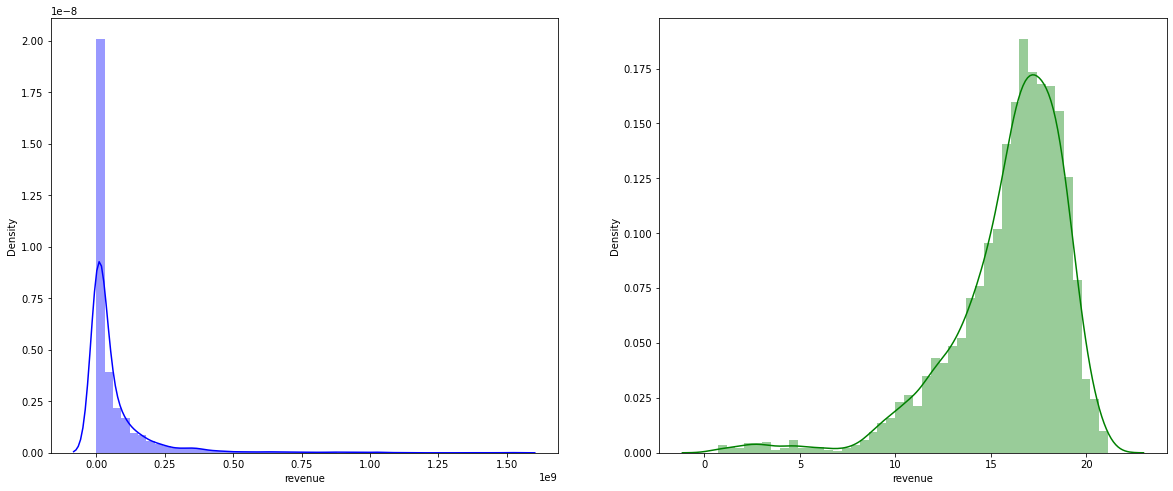

In [45]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(train['revenue'],ax=ax[0],color='blue')
sns.distplot(np.log1p(train['revenue']),ax=ax[1],color='green')

In [46]:
#'log_revenue' is better,  
# is more look like a normal distribution (with a bit right-skewed)
# so this distribution is more easy to handle after Logarithm Transformation
train['log_revenue'] = np.log1p(train['revenue'])

In [47]:
#Explore 'Budget'
train.budget.value_counts()

0           812
15000000     72
40000000     71
25000000     71
5000000      68
           ... 
747000        1
1119000       1
65000         1
1750000       1
1135654       1
Name: budget, Length: 406, dtype: int64

In [48]:
# Movies with 0 budget are impossible, so replace 0 with mean
median_budget = train.loc[train['budget'] > 0, 'budget'].median()
train["budget"] = train["budget"].mask(train["budget"] == 0, median_budget)
test["budget"] = test["budget"].mask(test["budget"] == 0, median_budget)

In [49]:
train.budget.value_counts()

16000000.0    839
15000000.0     72
40000000.0     71
25000000.0     71
5000000.0      68
             ... 
747000.0        1
1119000.0       1
65000.0         1
1750000.0       1
1135654.0       1
Name: budget, Length: 405, dtype: int64

<AxesSubplot:xlabel='log_budget', ylabel='Density'>

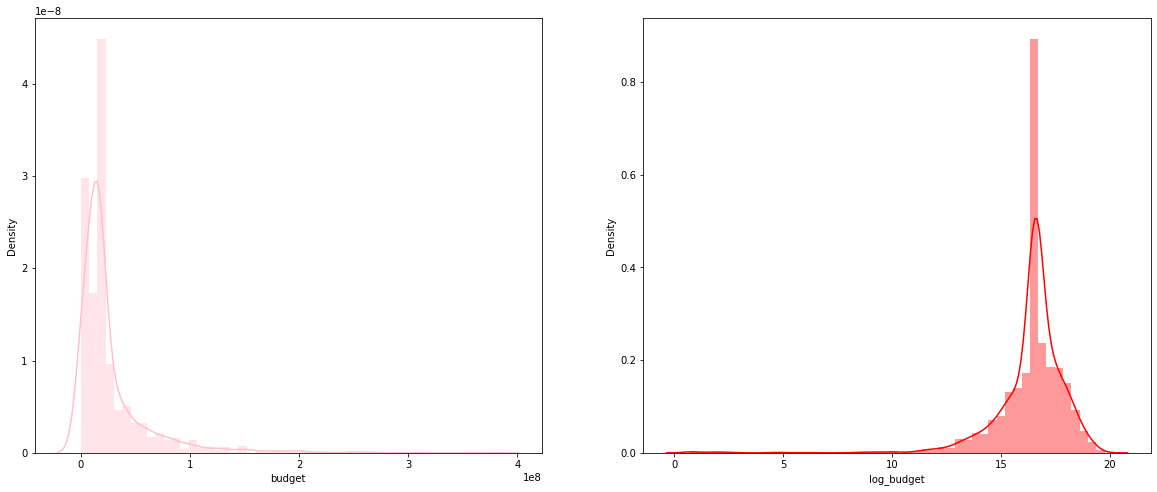

In [50]:
# same as 'revenue'
train['log_budget'] = np.log1p(train['budget'])

fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(train['budget'],ax=ax[0],color='pink')
sns.distplot((train['log_budget']),ax=ax[1],color='red')

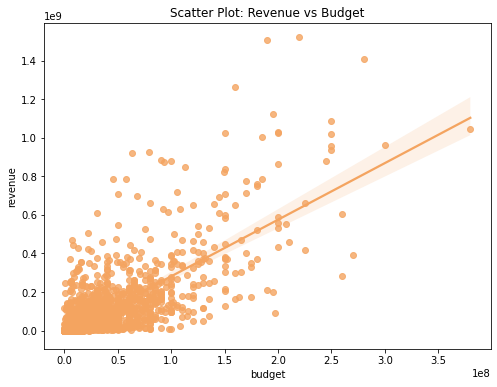

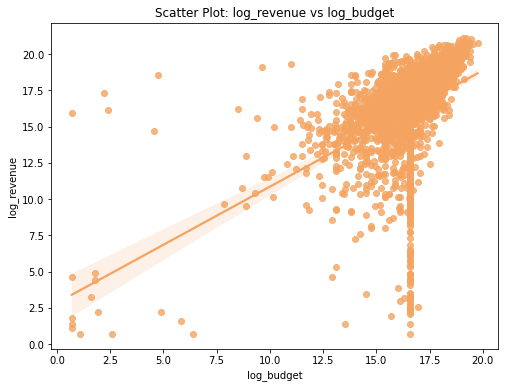

In [51]:
# Scatter plot can be used to investigate the relationship between 2 continuous variables
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x= train['budget'], y= train['revenue'], color="sandybrown")
ax.set_title('Scatter Plot: Revenue vs Budget');

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x= train['log_budget'], y= (train['log_revenue']), color="sandybrown")
ax.set_title('Scatter Plot: log_revenue vs log_budget');

In [52]:
# Compare correlation for different combinations 
corr_revenue_budget = np.corrcoef(train['budget'], train['revenue'])[0,1]
print("Correlation between revenue and budget:  %.4f" % corr_revenue_budget)

corr_revenue_budget = np.corrcoef(train['log_budget'], train['log_revenue'])[0,1]
print("Correlation between log_revenue and log_budget:  %.4f" % corr_revenue_budget)

corr_revenue_budget = np.corrcoef(train['budget'], train['log_revenue'])[0,1]
print("Correlation between log_revenue and budget:  %.4f" % corr_revenue_budget)

corr_revenue_budget = np.corrcoef(train['log_budget'], train['revenue'])[0,1]
print("Correlation between revenue and log_budget:  %.4f" % corr_revenue_budget)

Correlation between revenue and budget:  0.7471
Correlation between log_revenue and log_budget:  0.4545
Correlation between log_revenue and budget:  0.4333
Correlation between revenue and log_budget:  0.3711


In [53]:
#Since the correlation between revenue and budget is around 0.75 
#and we can see strong relationship between them in above scatter plot. 
#Therefore, the variable budget will be incldued in the modelling.

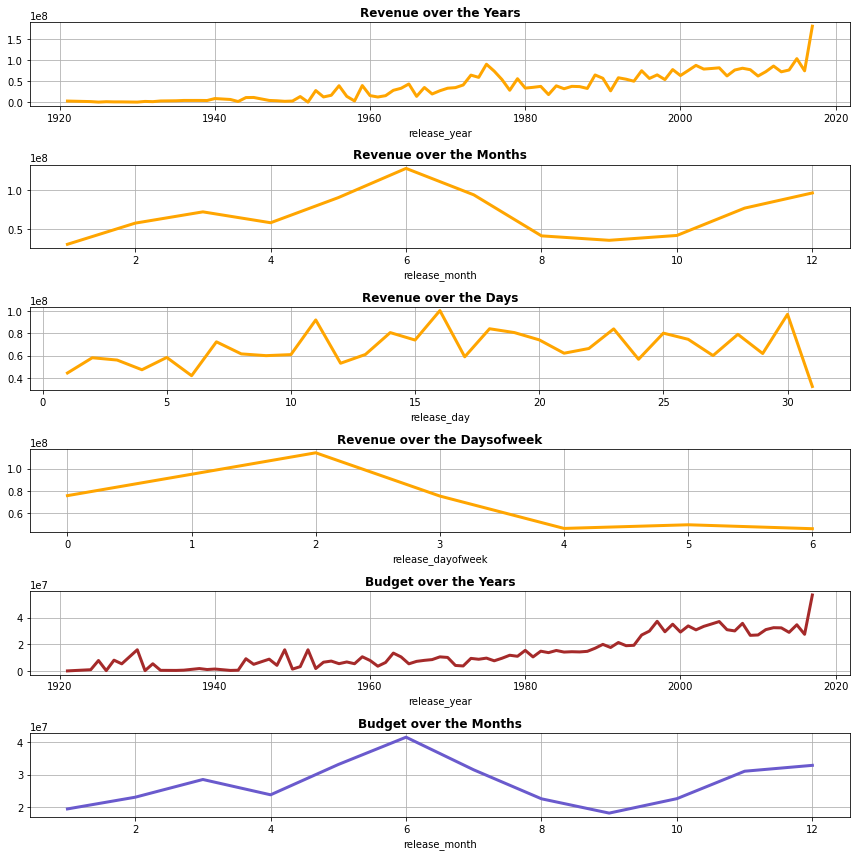

In [54]:
fig, ax = plt.subplots(6, 1, tight_layout=True)
plt.grid()

train.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(12, 12), linewidth=3, color='orange').set_title('Revenue over the Years', fontweight="bold")
ax[0].grid()

train.groupby('release_month')['revenue'].mean().plot(ax=ax[1], figsize=(12, 12), linewidth=3, color='orange').set_title('Revenue over the Months', fontweight="bold")
ax[1].grid()

train.groupby('release_day')['revenue'].mean().plot(ax=ax[2], figsize=(12, 12), linewidth=3, color='orange').set_title('Revenue over the Days', fontweight="bold")
ax[2].grid()

train.groupby('release_dayofweek')['revenue'].mean().plot(ax=ax[3], figsize=(12, 12), linewidth=3, color='orange').set_title('Revenue over the Daysofweek', fontweight="bold")
ax[3].grid()

train.groupby('release_year')['budget'].mean().plot(ax=ax[4], figsize=(12, 12), linewidth=3, color='brown').set_title('Budget over the Years', fontweight="bold")
ax[4].grid()

train.groupby('release_month')['budget'].mean().plot(ax=ax[5], figsize=(12, 12), linewidth=3, color='slateblue').set_title('Budget over the Months', fontweight="bold")
ax[5].grid()

fig.tight_layout(pad=2.0)
plt.show()

In [55]:
#Explore 'popularity'
train['popularity'].describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

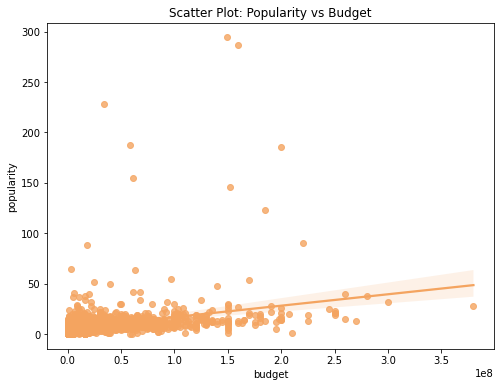

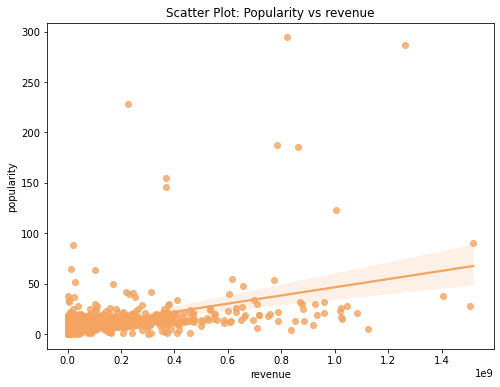

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x= train['budget'], y= train['popularity'], color="sandybrown")
ax.set_title('Scatter Plot: Popularity vs Budget');

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x= train['revenue'], y= (train['popularity']), color="sandybrown")
ax.set_title('Scatter Plot: Popularity vs revenue');

In [57]:
# it has low correlation with the target.
corr_revenue_popularity = np.corrcoef(train['popularity'], train['revenue'])[0,1]
print("Correlation between revenue and popularity:  %.4f" % corr_revenue_popularity)

Correlation between revenue and popularity:  0.4615


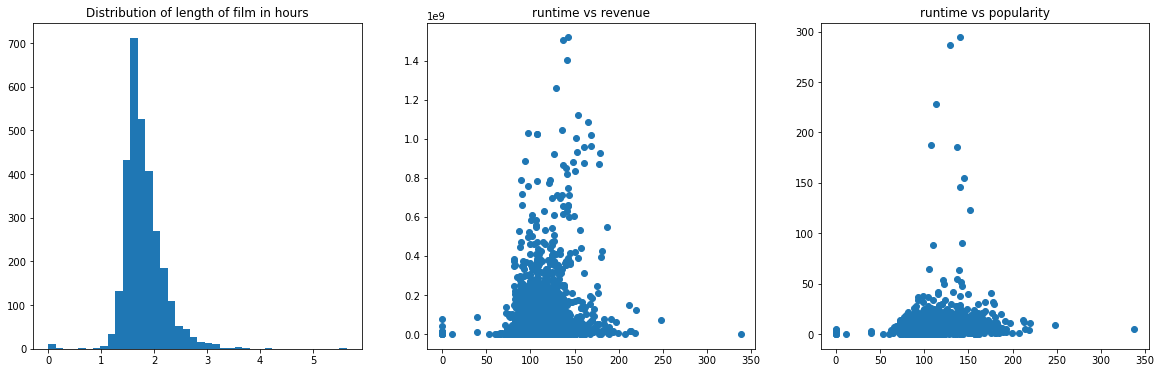

In [58]:
#'Runtime'
# Most of the films are 1.5-2 hour long and films with the highest revenue are also in this range
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(train['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(train['runtime'].fillna(0), train['revenue'])
plt.title('runtime vs revenue');
plt.subplot(1, 3, 3)
plt.scatter(train['runtime'].fillna(0), train['popularity'])
plt.title('runtime vs popularity');

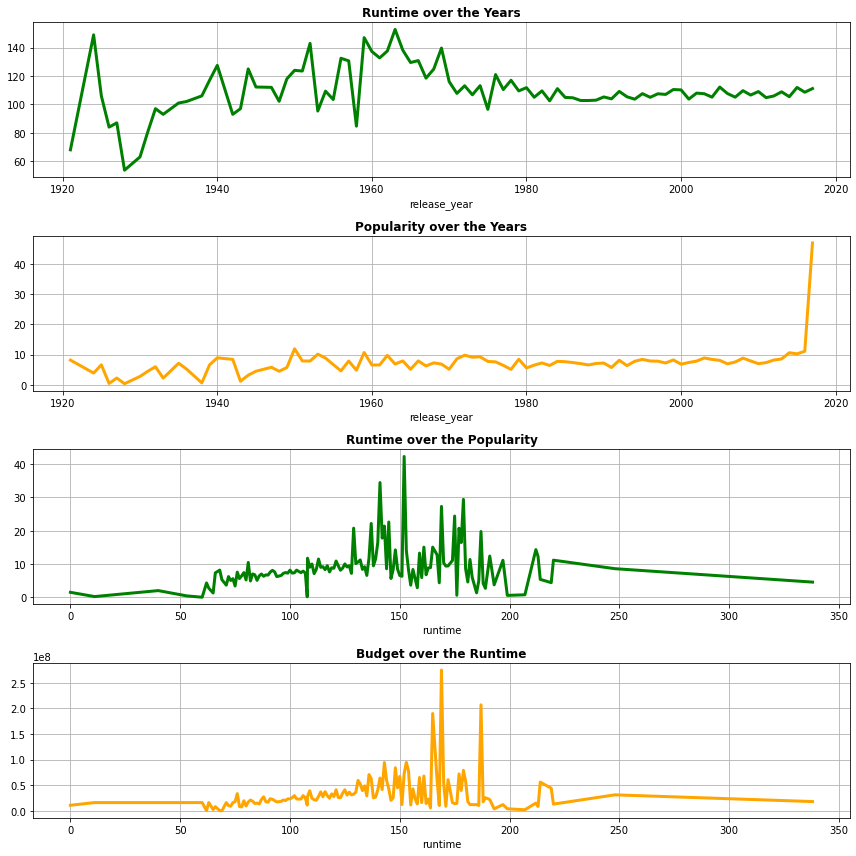

In [59]:
fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

train.groupby('release_year')['runtime'].mean().plot(ax=ax[0], figsize=(12, 12), linewidth=3, color='green').set_title('Runtime over the Years', fontweight="bold")
ax[0].grid()

train.groupby('release_year')['popularity'].mean().plot(ax=ax[1], figsize=(12, 12), linewidth=3, color='orange').set_title('Popularity over the Years', fontweight="bold")
ax[1].grid()

train.groupby('runtime')['popularity'].mean().plot(ax=ax[2], figsize=(12, 12), linewidth=3, color='green').set_title('Runtime over the Popularity', fontweight="bold")
ax[2].grid()

train.groupby('runtime')['budget'].mean().plot(ax=ax[3], figsize=(12, 12), linewidth=3, color='orange').set_title('Budget over the Runtime', fontweight="bold")
ax[3].grid()

fig.tight_layout(pad=2.0)
plt.show()

In [60]:
#Non-Numerical Variables
#Removing columns with less linkage with revenue by common sense
#In order to reduce the complexity of the task, we will filter out some columns that is less relevant to revenue by common sense.

#Columns will be removed:
#id (temporary id for a movie, it does not have any value for analysis)
#original_title (not useful for analysis)
#overview (will not apply complex text mining in the project)
#title (not useful for analysis)
#spoken_languages (people concern on original language more)

In [61]:
#Explore 'belongs_to_collection'
train['belongs_to_collection'] = train['belongs_to_collection'].apply(lambda x: 0 if x==0 else 1)
test['belongs_to_collection'] = test['belongs_to_collection'].apply(lambda x: 0 if x==0 else 1)

In [62]:
train.belongs_to_collection.value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

Text(0.5, 1.0, 'Revenue on No Collection Movie vs Collection Movie')

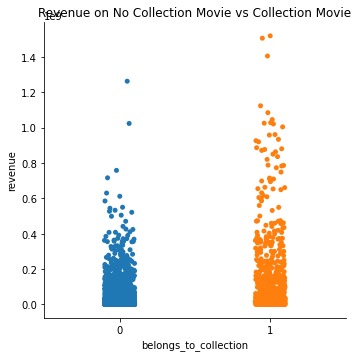

In [63]:
sns.catplot(x='belongs_to_collection', y='revenue', data=train)
plt.title('Revenue on No Collection Movie vs Collection Movie')

In [64]:
corr_revenue_collection = np.corrcoef(train['belongs_to_collection'], train['revenue'])[0,1]
print("Correlation between revenue and belongs_to_collection:  %.4f" % corr_revenue_collection)

Correlation between revenue and belongs_to_collection:  0.3394


In [65]:
#'original_language'
train['original_language'] = train['original_language'].apply(lambda x: 1 if x=="en" else 0)
test['original_language'] = test['original_language'].apply(lambda x: 1 if x=="en" else 0)

In [66]:
train.original_language.value_counts()

1    2575
0     425
Name: original_language, dtype: int64

Text(0.5, 1.0, 'Revenue on Non-English Films vs English Films')

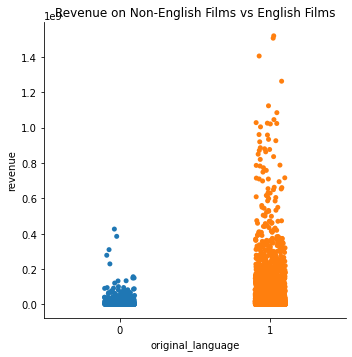

In [67]:
sns.catplot(x='original_language', y='revenue', data=train)
plt.title('Revenue on Non-English Films vs English Films')

In [68]:
# First, I am converting the features in Json format to nominal format
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [69]:
train.genres = train.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.spoken_languages = train.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.cast = train.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.crew = train.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

test.genres = test.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.spoken_languages = test.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.cast = test.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.crew = test.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

In [70]:
train['genres'].value_counts()

Drama                                       266
Comedy                                      186
Drama,Romance                               127
Comedy,Drama                                114
Comedy,Drama,Romance                        110
                                           ... 
Animation,Family,Music                        1
Drama,Fantasy,Mystery,Romance,Thriller        1
Crime,Drama,Science Fiction,Thriller          1
Adventure,Family,Mystery,Science Fiction      1
Action,Adventure,Drama,Family,Fantasy         1
Name: genres, Length: 539, dtype: int64

In [71]:
#reference: https://www.kaggle.com/code/bernabas/eda-random-forest-xgboost-tmdb-box-office
# Then count the occurances in those features which I plan to use in the model, unless they are not redundant.
# For instance, one might expect higher revenue from a movie if that movie was produced in several spoken languages and/or had a more crowded crew. 

train['genres_count'] = train['genres'].str.count(',') + 1
train['spoken_languages_count'] = train['spoken_languages'].str.count(',') + 1
train['cast_count'] = train['cast'].str.count(',') + 1
train['crew_count'] = train['crew'].str.count(',') + 1

test['genres_count'] = test['genres'].str.count(',') + 1
test['spoken_languages_count'] = test['spoken_languages'].str.count(',') + 1
test['cast_count'] = test['cast'].str.count(',') + 1
test['crew_count'] = test['crew'].str.count(',') + 1
test['genres_count']

0       4
1       2
2       2
3       3
4       2
       ..
4393    1
4394    4
4395    1
4396    2
4397    1
Name: genres_count, Length: 4398, dtype: int64

In [72]:
#reference: https://www.kaggle.com/code/bernabas/eda-random-forest-xgboost-tmdb-box-office
# Converting nominal data to numberical data 
train[['original_language', 
      'production_companies', 
      'production_countries']] = train[['original_language', 
               'production_companies',
               'production_countries']].astype('category')


train['original_language'] = train['original_language'].cat.codes
train['production_companies'] = train['production_companies'].cat.codes
train['production_countries'] = train['production_countries'].cat.codes

test[['original_language', 
      'production_companies', 
      'production_countries']] = test[['original_language', 
               'production_companies',
               'production_countries']].astype('category')

test['original_language'] = test['original_language'].cat.codes
test['production_companies'] = test['production_companies'].cat.codes
test['production_countries'] = test['production_countries'].cat.codes

train['production_countries']

0       317
1       317
2       317
3       211
4       237
       ... 
2995    317
2996    112
2997    317
2998    317
2999    317
Name: production_countries, Length: 3000, dtype: int16

In [73]:
# Module research
# Assigning the data corresponding to the target and predictor variables
y = train['log_revenue']
X = train.drop(['log_revenue', 'revenue'], axis=1)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [74]:
# Creating the list of features
feature_names = ['release_year', 'release_day', 'release_month', 'original_language',
                 'budget', 'popularity', 'genres_count', 'production_companies', 'production_countries',
                'spoken_languages_count', 'cast_count', 'crew_count', 'runtime']

# Assigning the data corresponding to features in feature_names
X_train_full = X_train_full[feature_names]

X_valid_full = X_valid_full[feature_names]

X_train_full.head()

,release_year,release_day,release_month,original_language,budget,popularity,genres_count,production_companies,production_countries,spoken_languages_count,cast_count,crew_count,runtime
2370,2012,27,3,1,150000000.0,7.739904,1,1013,122,1,18,31,99.0
1774,2001,19,10,1,35000000.0,7.790140,3,1998,81,3,26,65,122.0
731,1967,11,12,1,4000000.0,5.032469,3,1713,317,1,18,25,108.0
271,2006,4,8,1,72500000.0,6.936688,1,386,317,1,24,14,116.0
1077,1980,8,8,1,20000000.0,3.782547,3,2169,317,1,19,15,96.0


In [75]:
# Defining the Random Forest Model 
rf_model = RandomForestRegressor(random_state=39)
# Fitting the model 
rf_model.fit(X_train_full, y_train)
# Prediction
y_pred_rf = rf_model.predict(X_valid_full)

# Calculate RMSE
rf_rmse= np.sqrt(mean_squared_error(y_valid, y_pred_rf))
rf_rmse


2.0910228704589255

<AxesSubplot:>

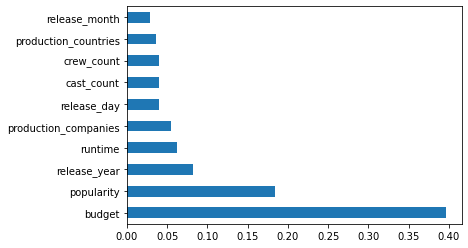

In [76]:
# Calculating feature importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [77]:
# Define the XGBoostmodel
xgb_model = XGBRegressor()

# Fit the model
xgb_model.fit(X_train_full, y_train)
# Prediction
y_pred_xgb = xgb_model.predict(X_valid_full)

xgb_rmse= np.sqrt(mean_squared_error(y_valid, y_pred_xgb))
xgb_rmse

2.2268147279365027

<AxesSubplot:>

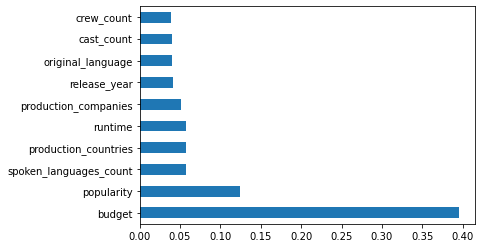

In [78]:
# Calculating feature importance for the XGBoost Model
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')


In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
rg_model = Ridge()
rg_model.fit(X_train_full, y_train)
#prediction
y_pred_rg = rg_model.predict(X_valid_full)

rg_rmse= np.sqrt(mean_squared_error(y_valid, y_pred_rg))
rg_rmse

2.52395018348213

In [80]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
ls_model = Lasso()
ls_model.fit(X_train_full, y_train)

#prediction
y_pred_ls = ls_model.predict(X_valid_full)

ls_rmse= np.sqrt(mean_squared_error(y_valid, y_pred_ls))
ls_rmse

2.535626548290038

<AxesSubplot:>

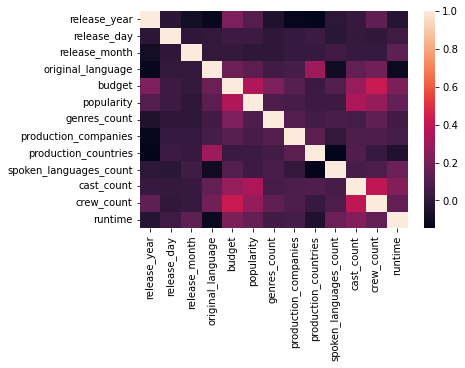

In [84]:
sns.heatmap(X_train_full.corr())

In [82]:
#Experiment2, delete some features
#Assigning the data corresponding to the target and predictor variables
y2 = train['log_revenue']
X2 = train.drop(['log_revenue', 'revenue'], axis=1)
X2_train_full, X2_valid_full, y2_train, y2_valid = train_test_split(X2, y2, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [83]:
# Creating the list of features
feature2_names = ['budget', 'popularity', 'genres_count', 
                'spoken_languages_count', 'cast_count', 'crew_count', 'runtime']

# Assigning the data corresponding to features in feature_names
X2_train_full = X2_train_full[feature2_names]

X2_valid_full = X2_valid_full[feature2_names]

X2_train_full.head()

,budget,popularity,genres_count,spoken_languages_count,cast_count,crew_count,runtime
2370,150000000.0,7.739904,1,1,18,31,99.0
1774,35000000.0,7.790140,3,3,26,65,122.0
731,4000000.0,5.032469,3,1,18,25,108.0
271,72500000.0,6.936688,1,1,24,14,116.0
1077,20000000.0,3.782547,3,1,19,15,96.0


In [79]:
#Experiment2, delete some features but cannot use RF
# X has 7 features, but RandomForestRegressor is expecting 13 features as input.
#Defining the Random Forest Model 
#rf_model2 = RandomForestRegressor(random_state=1)
#rf_model2.fit(X2_train_full, y2_train)
#y2_pred_rf = rf_model.predict(X2_valid_full)
#rf_rmse2= np.sqrt(mean_squared_error(y2_valid, y2_pred_rf))
#rf_rmse2

In [80]:
#Experiment2 Define the model
xgb_model2 = XGBRegressor()

# Fit the model
xgb_model2.fit(X2_train_full, y2_train)

# Prediction
y2_pred_xgb = xgb_model2.predict(X2_valid_full)
xgb_rmse2= np.sqrt(mean_squared_error(y2_valid, y2_pred_xgb))
xgb_rmse2

2.398927663266932

In [81]:
rg_model2 = Ridge()
rg_model2.fit(X2_train_full, y2_train)
y2_pred_rg = rg_model2.predict(X2_valid_full)
rg_rmse2= np.sqrt(mean_squared_error(y2_valid, y2_pred_rg))
rg_rmse2

2.5658270110593637

In [82]:
ls_model2 = Lasso()
ls_model2.fit(X2_train_full, y2_train)
y2_pred_ls = ls_model2.predict(X2_valid_full)
ls_rmse2= np.sqrt(mean_squared_error(y2_valid, y2_pred_ls))
ls_rmse2

2.572475174002598

In [83]:
# Based on the RMSE results, the Random Forest Model is given better results than XGBoost, Ridge and Lasso Model does. 
# Therefore, the final model is defined using RF 

X = train[feature_names]
X_test = test[feature_names]

In [84]:
# Defining the Final Model 
final_model = RandomForestRegressor(random_state=1)

# Fitting the model 
final_model.fit(X, y)

RandomForestRegressor(random_state=1)

In [85]:
# Prediction
y_pred_final = final_model.predict(X_test)
pred = pd.DataFrame(y_pred_final)

In [86]:
# print 
datasets = pd.concat([submission['id'], pred], axis=1)
datasets.columns =['id', 'revenue']
datasets.to_csv('submission.csv', index=False)